<a href="https://colab.research.google.com/github/MohamedHOmar/Lab/blob/main/bow_with_SVM_%2CLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers
!pip install -q simpletransformers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data_path = "/content/drive/MyDrive/Hate.csv"
df = pd.read_csv(data_path)

In [ ]:
import tensorflow as tf
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
label_categories = {0: 'no hate', 1: 'hate'}
df.drop(columns=['Split'], inplace=True)

In [ ]:
# Download the Somali stopwords file from a different source
!wget https://raw.githubusercontent.com/MohamedHOmar/Somali-Stopword/main/somali_stopwords.txt

# Read the stopwords from the local file
with open('somali_stopwords.txt', 'r') as file:
    somali_stopwords = [line.strip() for line in file]

# Use the local stopwords in the stopwords.words() function
default_stopwords = set(somali_stopwords)

--2024-06-03 09:44:58--  https://raw.githubusercontent.com/MohamedHOmar/Somali-Stopword/main/somali_stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629 [text/plain]
Saving to: ‘somali_stopwords.txt’

somali_stopwords.tx 100%[===================>]     629  --.-KB/s    in 0s      

2024-06-03 09:44:58 (26.9 MB/s) - ‘somali_stopwords.txt’ saved [629/629]



In [ ]:
import pandas as pd
import re
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    text = ' '.join(word for word in text.split() if word not in somali_stopwords)
    return text
# Assuming 'Text' column contains the comments
df['Text'] = df['Text'].apply(clean_text)

# Now your text data is cleaned


In [ ]:
df.head(5)

,Text,Label
0,meshas hal mar tag gudoomiye ul uqaado,0
1,markiini horeba diinta dhinac baad haysateen,1
2,faarmaajo wasaq wasaq dhalay wecel naarta alle...,1
3,dalka intu hawiye kunolyahay raxmad malahan,1
4,nin xil iska casilaya hadaad aragto nin nool,0


In [ ]:
# Tokenize and pad sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad sequences
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df["Text"])
x = tokenizer.texts_to_sequences(df["Text"])
x = pad_sequences(x, maxlen=100)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Label'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [ ]:
print("Maximum sequence length:", x.shape[1])

Maximum sequence length: 100


In [ ]:
import numpy as np
y = np.array(df["Label"])

In [ ]:
print(x.shape)

(7417, 100)


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from collections import defaultdict
from imblearn.over_sampling import RandomOverSampler

# Assuming df['Text'] contains your text data and df['Label'] contains corresponding labels

# Construct Bag-of-Words representation manually
bow = defaultdict(int)
for text in df['Text']:
    words = text.split()
    for word in words:
        bow[word] += 1

# Convert Bag-of-Words representation to matrix
X_bow = []
for text in df['Text']:
    bow_vector = []
    words = text.split()
    for word in bow:
        bow_vector.append(words.count(word))
    X_bow.append(bow_vector)

# Convert y to integer labels
y = df['Label'].astype(int)

# Addressing Class Imbalance
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_bow, y)

# Split data into training and testing sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.2)

# Support Vector Machine Classifier with Hyperparameter Tuning
svm_classifier = SVC(kernel='linear', class_weight='balanced', random_state=42)  # Adjust hyperparameters as needed
svm_classifier.fit(X_train_bow, y_train)
svm_preds = svm_classifier.predict(X_test_bow)

# Evaluate Support Vector Machine Classifier
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds)
svm_recall = recall_score(y_test, svm_preds)
svm_f1 = f1_score(y_test, svm_preds)
svm_report = classification_report(y_test, svm_preds)

print("\nSupport Vector Machine Classifier Evaluation:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("Classification Report:")
print(svm_report)

# Print the Bag-of-Words representation (vocabulary)
vocabulary = list(bow.keys())
print("\nVocabulary (Bag-of-Words representation):", vocabulary)



Support Vector Machine Classifier Evaluation:
Accuracy: 0.7721441661576054
Precision: 0.8128491620111732
Recall: 0.7088915956151035
F1 Score: 0.7573194534808068
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       816
           1       0.81      0.71      0.76       821

    accuracy                           0.77      1637
   macro avg       0.78      0.77      0.77      1637
weighted avg       0.78      0.77      0.77      1637


Vocabulary (Bag-of-Words representation): ['meshas', 'hal', 'mar', 'tag', 'gudoomiye', 'ul', 'uqaado', 'markiini', 'horeba', 'diinta', 'dhinac', 'baad', 'haysateen', 'faarmaajo', 'wasaq', 'dhalay', 'wecel', 'naarta', 'alle', 'hakugu', 'fogeyo', 'xoolayahow', 'dalka', 'intu', 'hawiye', 'kunolyahay', 'raxmad', 'malahan', 'nin', 'xil', 'iska', 'casilaya', 'hadaad', 'aragto', 'nool', 'barlamanka', 'hirshabelle', 'socda', 'walle', 'waxbuu', 'ogyahay', 'kan', 'miskiin', 'mucaaradka', 'miy

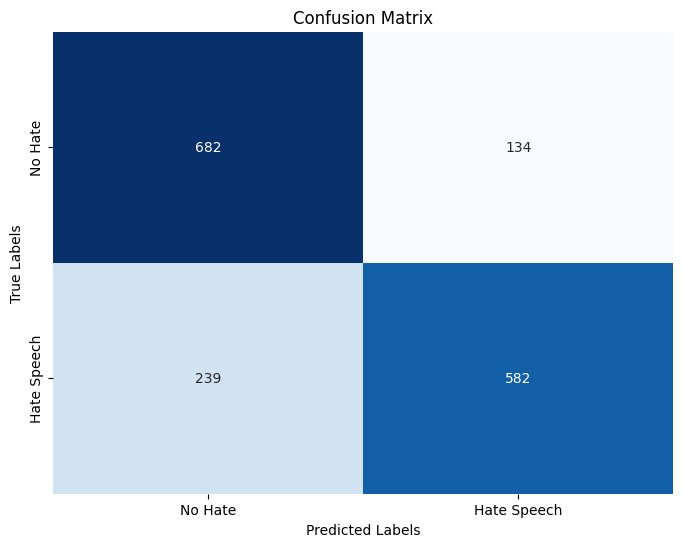

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the test set
y_pred = svm_classifier.predict(X_test_bow)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Hate', 'Hate Speech'], yticklabels=['No Hate', 'Hate Speech'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate probabilities for the positive class (class 1)
y_prob = svm_classifier.decision_function(X_test_bow)

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate Area Under Curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
new_input = "ilmo xaaraan lagu dhalay oo aabo la aan ah"  # Means "Bastard kids which don't have father"
new_input = clean_text(new_input)  # Assuming you have a function clean_text to preprocess the new input
new_input_bow = []

# Construct Bag-of-Words representation for the new input
for word in bow:
    new_input_bow.append(new_input.split().count(word))

# Reshape the input to match the shape expected by the model
new_input_bow = np.array(new_input_bow).reshape(1, -1)

# Predict using the SVM classifier
prediction_prob = svm_classifier.predict(new_input_bow)
predicted_class = "Hate Speech" if prediction_prob[0] == 1 else "No Hate"
print("Predicted Class:", predicted_class)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from collections import defaultdict
from imblearn.over_sampling import RandomOverSampler

# Assuming df['Text'] contains your text data and df['Label'] contains corresponding labels

# Construct Bag-of-Words representation manually
bow = defaultdict(int)
for text in df['Text']:
    words = text.split()
    for word in words:
        bow[word] += 1

# Convert Bag-of-Words representation to matrix
X_bow = []
for text in df['Text']:
    bow_vector = []
    words = text.split()
    for word in bow:
        bow_vector.append(words.count(word))
    X_bow.append(bow_vector)

# Convert y to integer labels
y = df['Label'].astype(int)

# Addressing Class Imbalance
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_bow, y)

# Split data into training and testing sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.2)

# Logistic Regression Classifier
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)  # Adjust hyperparameters as needed
logistic_regression.fit(X_train_bow, y_train)
logistic_preds = logistic_regression.predict(X_test_bow)

# Evaluate Logistic Regression Classifier
logistic_accuracy = accuracy_score(y_test, logistic_preds)
logistic_precision = precision_score(y_test, logistic_preds)
logistic_recall = recall_score(y_test, logistic_preds)
logistic_f1 = f1_score(y_test, logistic_preds)
logistic_report = classification_report(y_test, logistic_preds)

print("\nLogistic Regression Classifier Evaluation:")
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1 Score:", logistic_f1)
print("Classification Report:")
print(logistic_report)




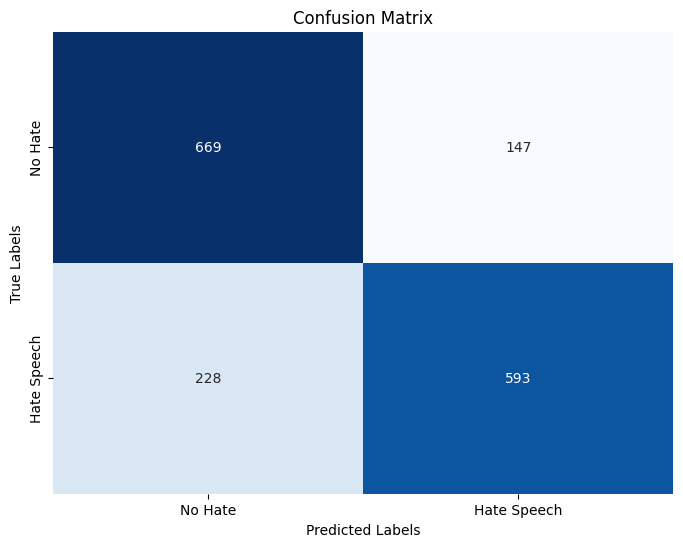

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the test set
y_pred = logistic_regression.predict(X_test_bow)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Hate', 'Hate Speech'], yticklabels=['No Hate', 'Hate Speech'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


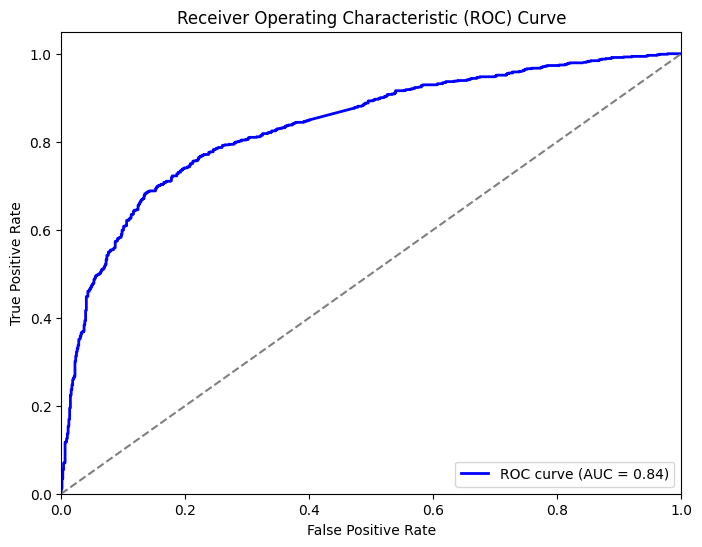

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate probabilities for the positive class (class 1)
y_prob = logistic_regression.decision_function(X_test_bow)

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate Area Under Curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
new_input = "ilmo xaaraan lagu dhalay oo aabo la aan ah"  # Means "Bastard kids which don't have father"
new_input = clean_text(new_input)  # Assuming you have a function clean_text to preprocess the new input
new_input_bow = []

# Construct Bag-of-Words representation for the new input
for word in bow:
    new_input_bow.append(new_input.split().count(word))

# Reshape the input to match the shape expected by the model
new_input_bow = np.array(new_input_bow).reshape(1, -1)

# Predict using the LR classifier
prediction_prob = logistic_regression.predict(new_input_bow)
predicted_class = "Hate Speech" if prediction_prob[0] == 1 else "No Hate"
print("Predicted Class:", predicted_class)


Predicted Class: Hate Speech


**NB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from collections import defaultdict
from imblearn.over_sampling import RandomOverSampler

# Assuming df['Text'] contains your text data and df['Label'] contains corresponding labels

# Construct Bag-of-Words representation manually
bow = defaultdict(int)
for text in df['Text']:
    words = text.split()
    for word in words:
        bow[word] += 1

# Convert Bag-of-Words representation to matrix
X_bow = []
for text in df['Text']:
    bow_vector = []
    words = text.split()
    for word in bow:
        bow_vector.append(words.count(word))
    X_bow.append(bow_vector)

# Convert y to integer labels
y = df['Label'].astype(int)

# Addressing Class Imbalance
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_bow, y)

# Split data into training and testing sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.2)

# Naive Bayes Classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_bow, y_train)
naive_bayes_preds = naive_bayes.predict(X_test_bow)

# Evaluate Naive Bayes Classifier
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_preds)
naive_bayes_precision = precision_score(y_test, naive_bayes_preds)
naive_bayes_recall = recall_score(y_test, naive_bayes_preds)
naive_bayes_f1 = f1_score(y_test, naive_bayes_preds)
naive_bayes_report = classification_report(y_test, naive_bayes_preds)

print("\nNaive Bayes Classifier Evaluation:")
print("Accuracy:", naive_bayes_accuracy)
print("Precision:", naive_bayes_precision)
print("Recall:", naive_bayes_recall)
print("F1 Score:", naive_bayes_f1)
print("Classification Report:")
print(naive_bayes_report)



Naive Bayes Classifier Evaluation:
Accuracy: 0.744654856444716
Precision: 0.7292377701934016
Recall: 0.7807551766138855
F1 Score: 0.7541176470588234
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       816
           1       0.73      0.78      0.75       821

    accuracy                           0.74      1637
   macro avg       0.75      0.74      0.74      1637
weighted avg       0.75      0.74      0.74      1637



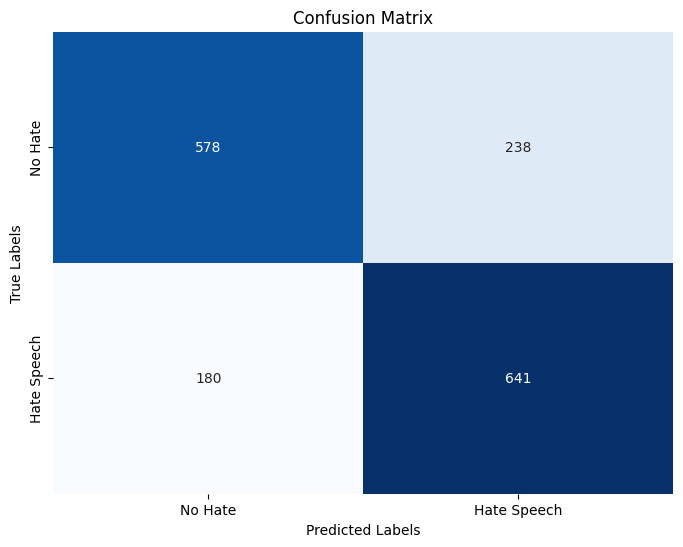

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the test set
y_pred = naive_bayes.predict(X_test_bow)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Hate', 'Hate Speech'], yticklabels=['No Hate', 'Hate Speech'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


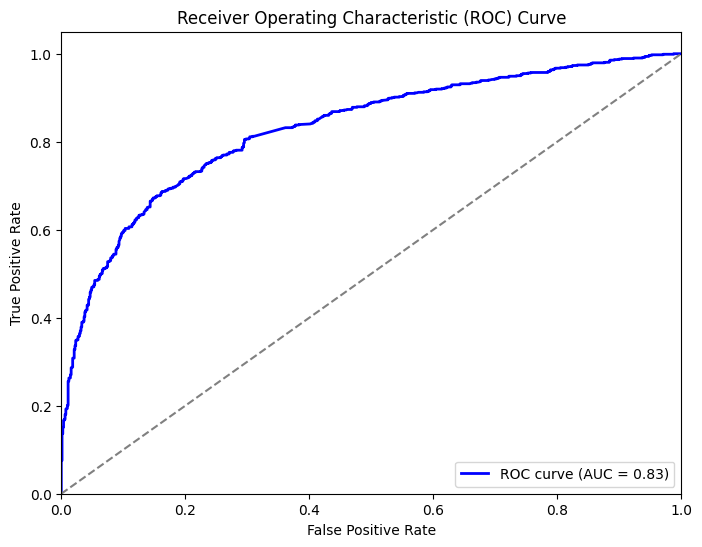

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Calculate probabilities for the positive class (class 1)
y_prob = naive_bayes.predict_proba(X_test_bow)[:, 1]  # Probability of class 1

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate Area Under Curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
new_input = "ilmo xaaraan lagu dhalay oo aabo la aan ah"  # Means "Bastard kids which don't have father"
new_input = clean_text(new_input)  # Assuming you have a function clean_text to preprocess the new input
new_input_bow = []

# Construct Bag-of-Words representation for the new input
for word in bow:
    new_input_bow.append(new_input.split().count(word))

# Reshape the input to match the shape expected by the model
new_input_bow = np.array(new_input_bow).reshape(1, -1)

# Predict using the NB classifier
prediction_prob = naive_bayes.predict(new_input_bow)
predicted_class = "Hate Speech" if prediction_prob[0] == 1 else "No Hate"
print("Predicted Class:", predicted_class)



Predicted Class: Hate Speech


**RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from collections import defaultdict
from imblearn.over_sampling import RandomOverSampler

# Assuming df['Text'] contains your text data and df['Label'] contains corresponding labels

# Construct Bag-of-Words representation manually
bow = defaultdict(int)
for text in df['Text']:
    words = text.split()
    for word in words:
        bow[word] += 1

# Convert Bag-of-Words representation to matrix
X_bow = []
for text in df['Text']:
    bow_vector = []
    words = text.split()
    for word in bow:
        bow_vector.append(words.count(word))
    X_bow.append(bow_vector)

# Convert y to integer labels
y = df['Label'].astype(int)

# Addressing Class Imbalance
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_bow, y)

# Split data into training and testing sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.2)

# Random Forest Classifier with Hyperparameter Tuning
random_forest_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)  # Adjust hyperparameters as needed
random_forest_classifier.fit(X_train_bow, y_train)
rf_preds = random_forest_classifier.predict(X_test_bow)

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
rf_report = classification_report(y_test, rf_preds)

print("\nRandom Forest Classifier Evaluation:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Classification Report:")
print(rf_report)

# Print the Bag-of-Words representation (vocabulary)
vocabulary = list(bow.keys())
print("\nVocabulary (Bag-of-Words representation):", vocabulary)



Random Forest Classifier Evaluation:
Accuracy: 0.7617593158216249
Precision: 0.823088455772114
Recall: 0.6686967113276492
F1 Score: 0.7379032258064517
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       816
           1       0.82      0.67      0.74       821

    accuracy                           0.76      1637
   macro avg       0.77      0.76      0.76      1637
weighted avg       0.77      0.76      0.76      1637


Vocabulary (Bag-of-Words representation): ['meshas', 'hal', 'mar', 'tag', 'gudoomiye', 'ul', 'uqaado', 'markiini', 'horeba', 'diinta', 'dhinac', 'baad', 'haysateen', 'faarmaajo', 'wasaq', 'dhalay', 'wecel', 'naarta', 'alle', 'hakugu', 'fogeyo', 'xoolayahow', 'dalka', 'intu', 'hawiye', 'kunolyahay', 'raxmad', 'malahan', 'nin', 'xil', 'iska', 'casilaya', 'hadaad', 'aragto', 'nool', 'barlamanka', 'hirshabelle', 'socda', 'walle', 'waxbuu', 'ogyahay', 'kan', 'miskiin', 'mucaaradka', 'miyuu', 'kubi

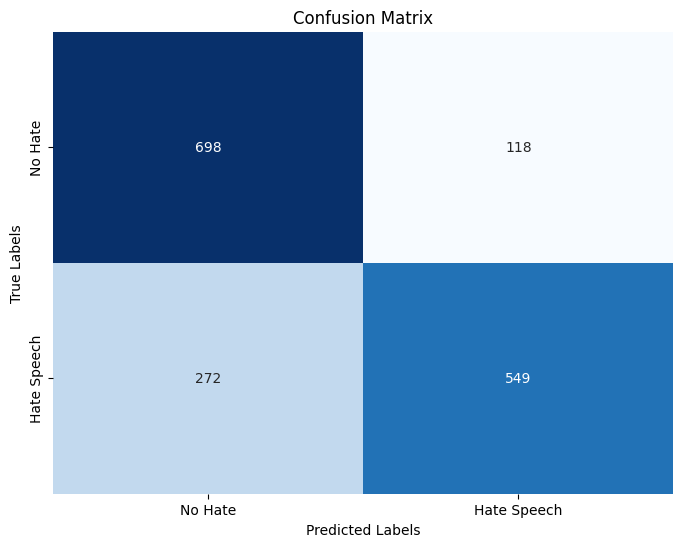

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the test set
y_pred = random_forest_classifier.predict(X_test_bow)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Hate', 'Hate Speech'], yticklabels=['No Hate', 'Hate Speech'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


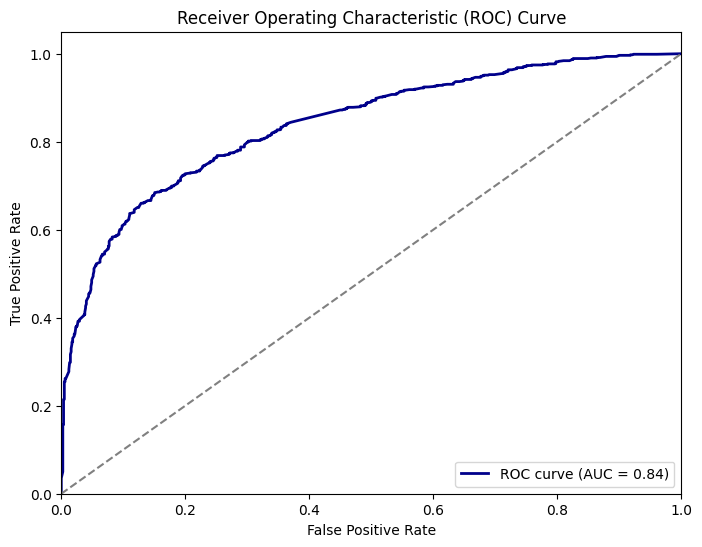

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate probabilities for the positive class (class 1)
y_prob = random_forest_classifier.predict_proba(X_test_bow)[:, 1]  # Probability of class 1

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate Area Under Curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
new_input = "ilmo xaaraan lagu dhalay oo aabo la aan ah"  # Means "Bastard kids which don't have father"
new_input = clean_text(new_input)  # Assuming you have a function clean_text to preprocess the new input
new_input_bow = []

# Construct Bag-of-Words representation for the new input
for word in bow:
    new_input_bow.append(new_input.split().count(word))

# Reshape the input to match the shape expected by the model
new_input_bow = np.array(new_input_bow).reshape(1, -1)

# Predict using the RF classifier
prediction_prob = random_forest_classifier.predict(new_input_bow)
predicted_class = "Hate Speech" if prediction_prob[0] == 1 else "No Hate"
print("Predicted Class:", predicted_class)



Predicted Class: Hate Speech
